In [21]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv('realtor_data.csv')
df.head()
df.dtypes

brokered_by       float64
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object

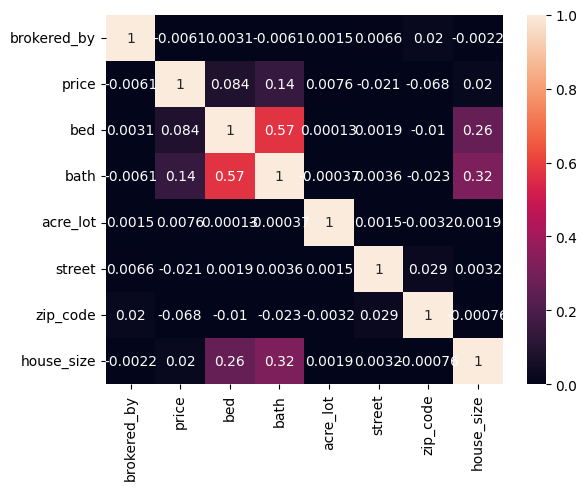

<Figure size 9000x1000 with 0 Axes>

In [4]:
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=0, vmax=1)
plt.figure(figsize=(90, 10))
plt.show()


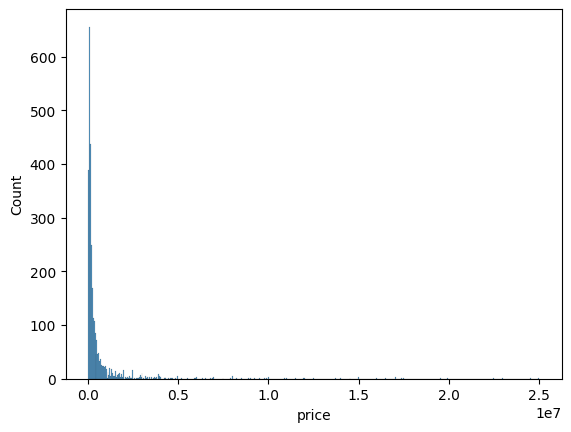

In [5]:
sns.histplot(df.iloc[0:3000,], x='price')
plt.show()

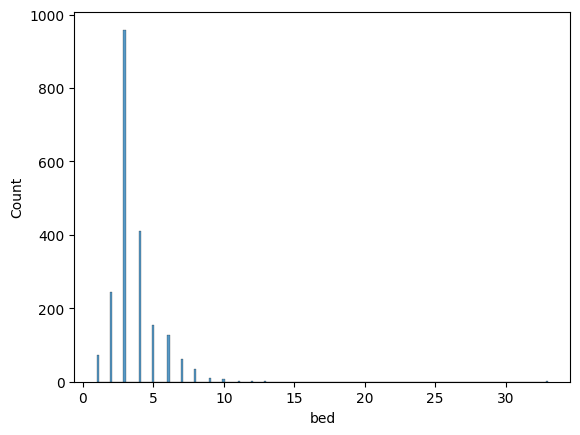

In [6]:
sns.histplot(df.iloc[0:3000,], x='bed')
plt.show()

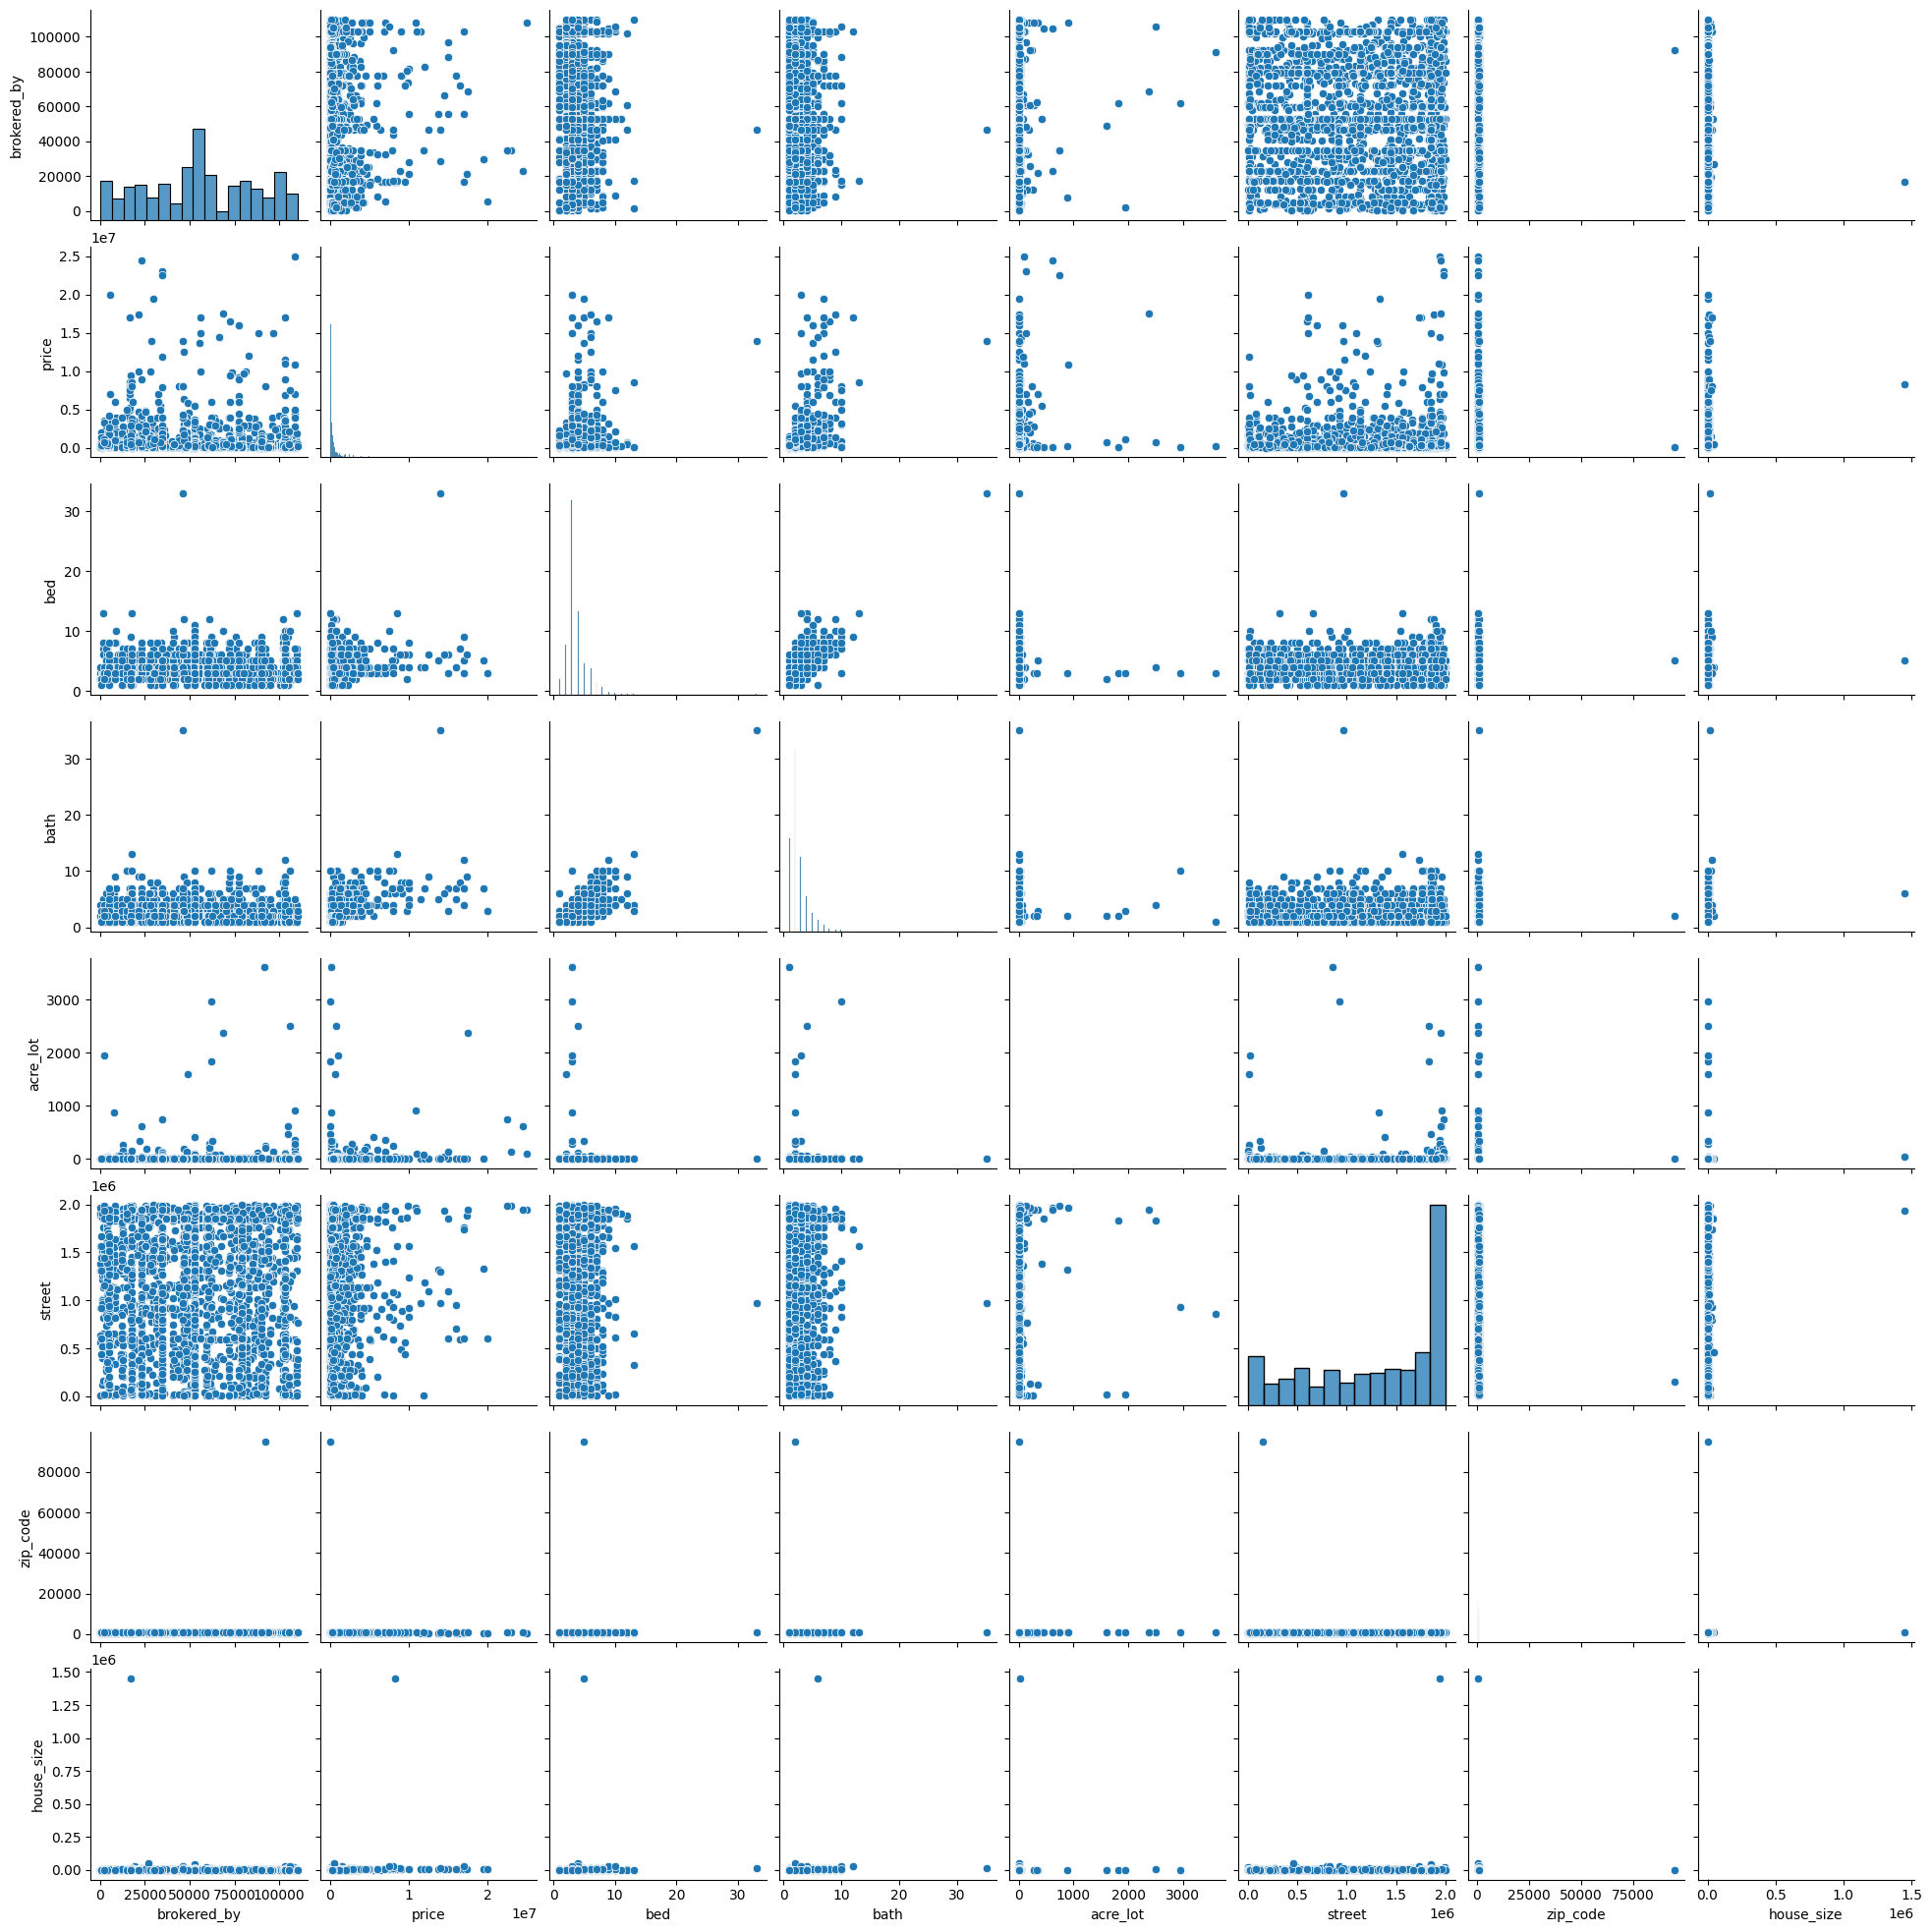

In [7]:
sns.pairplot(df.iloc[0:3000,].select_dtypes(['float', 'int']))
plt.show()

In [8]:
df1=df.dropna()
df1.describe

<bound method NDFrame.describe of          brokered_by    status      price  bed  bath  acre_lot     street  \
502          92147.0  for_sale   110000.0  7.0   3.0      0.09  1842706.0   
2270         94933.0  for_sale   950000.0  5.0   4.0      0.99  1260473.0   
2277        103341.0  for_sale  6899000.0  4.0   6.0      0.83    17467.0   
3409         21163.0  for_sale   525000.0  3.0   3.0      0.45  1813270.0   
3410         67455.0  for_sale   289900.0  3.0   2.0      0.36  1698080.0   
...              ...       ...        ...  ...   ...       ...        ...   
1048546      81759.0  for_sale   325000.0  4.0   3.0      0.30  1198000.0   
1048547      92851.0  for_sale   305900.0  4.0   3.0      0.18   771508.0   
1048548     109440.0  for_sale   380000.0  4.0   3.0      0.38   665554.0   
1048550      70650.0  for_sale   303000.0  4.0   2.0      0.24   443392.0   
1048551      92851.0  for_sale   269000.0  4.0   2.0      0.19   760137.0   

                   city           state  

In [9]:
duplicates = df1.duplicated(subset=['price','street','city', 'state','zip_code','house_size'], keep=False)
df1[duplicates].sort_values('house_size')

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
115074,79720.0,for_sale,110000.0,1.0,1.0,0.01,595836.0,Vernon,New Jersey,7462.0,408.0,7/28/2004
66510,30765.0,for_sale,110000.0,1.0,1.0,0.01,595836.0,Vernon,New Jersey,7462.0,408.0,7/28/2004
60585,30615.0,for_sale,284999.0,1.0,1.0,2.44,1717484.0,Howard Beach,New York,11414.0,750.0,4/5/2017
54143,30615.0,for_sale,284999.0,1.0,2.0,2.44,1717484.0,Howard Beach,New York,11414.0,750.0,4/5/2017
201448,31687.0,for_sale,137000.0,3.0,1.0,0.04,1218407.0,Philadelphia,Pennsylvania,19124.0,800.0,3/24/2022
...,...,...,...,...,...,...,...,...,...,...,...,...
8462,41534.0,for_sale,1999500.0,5.0,5.0,45.80,473360.0,Chatham,New York,12060.0,6518.0,5/6/1999
367575,6907.0,for_sale,2490000.0,5.0,6.0,2.20,567135.0,Alpharetta,Georgia,30009.0,7500.0,1/31/2023
367576,6907.0,for_sale,2490000.0,5.0,6.0,2.20,567135.0,Alpharetta,Georgia,30009.0,7500.0,9/1/2021
114386,43496.0,for_sale,6299000.0,6.0,8.0,1.65,869832.0,Westport,Connecticut,6880.0,8500.0,3/31/2021


In [10]:
df1=df1.drop_duplicates(subset=['price','street','city', 'state','zip_code','house_size']).copy()

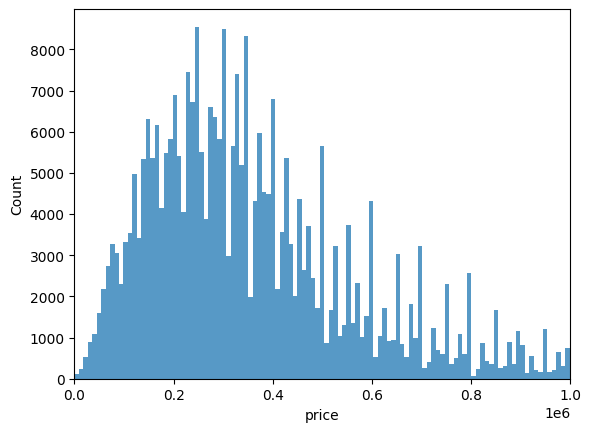

In [11]:
sns.histplot(df1['price'])
plt.xlim(0, 1000000)
plt.show()

In [12]:
df2=df1[df1['city']=='Vernon']
df2.shape

(81, 12)

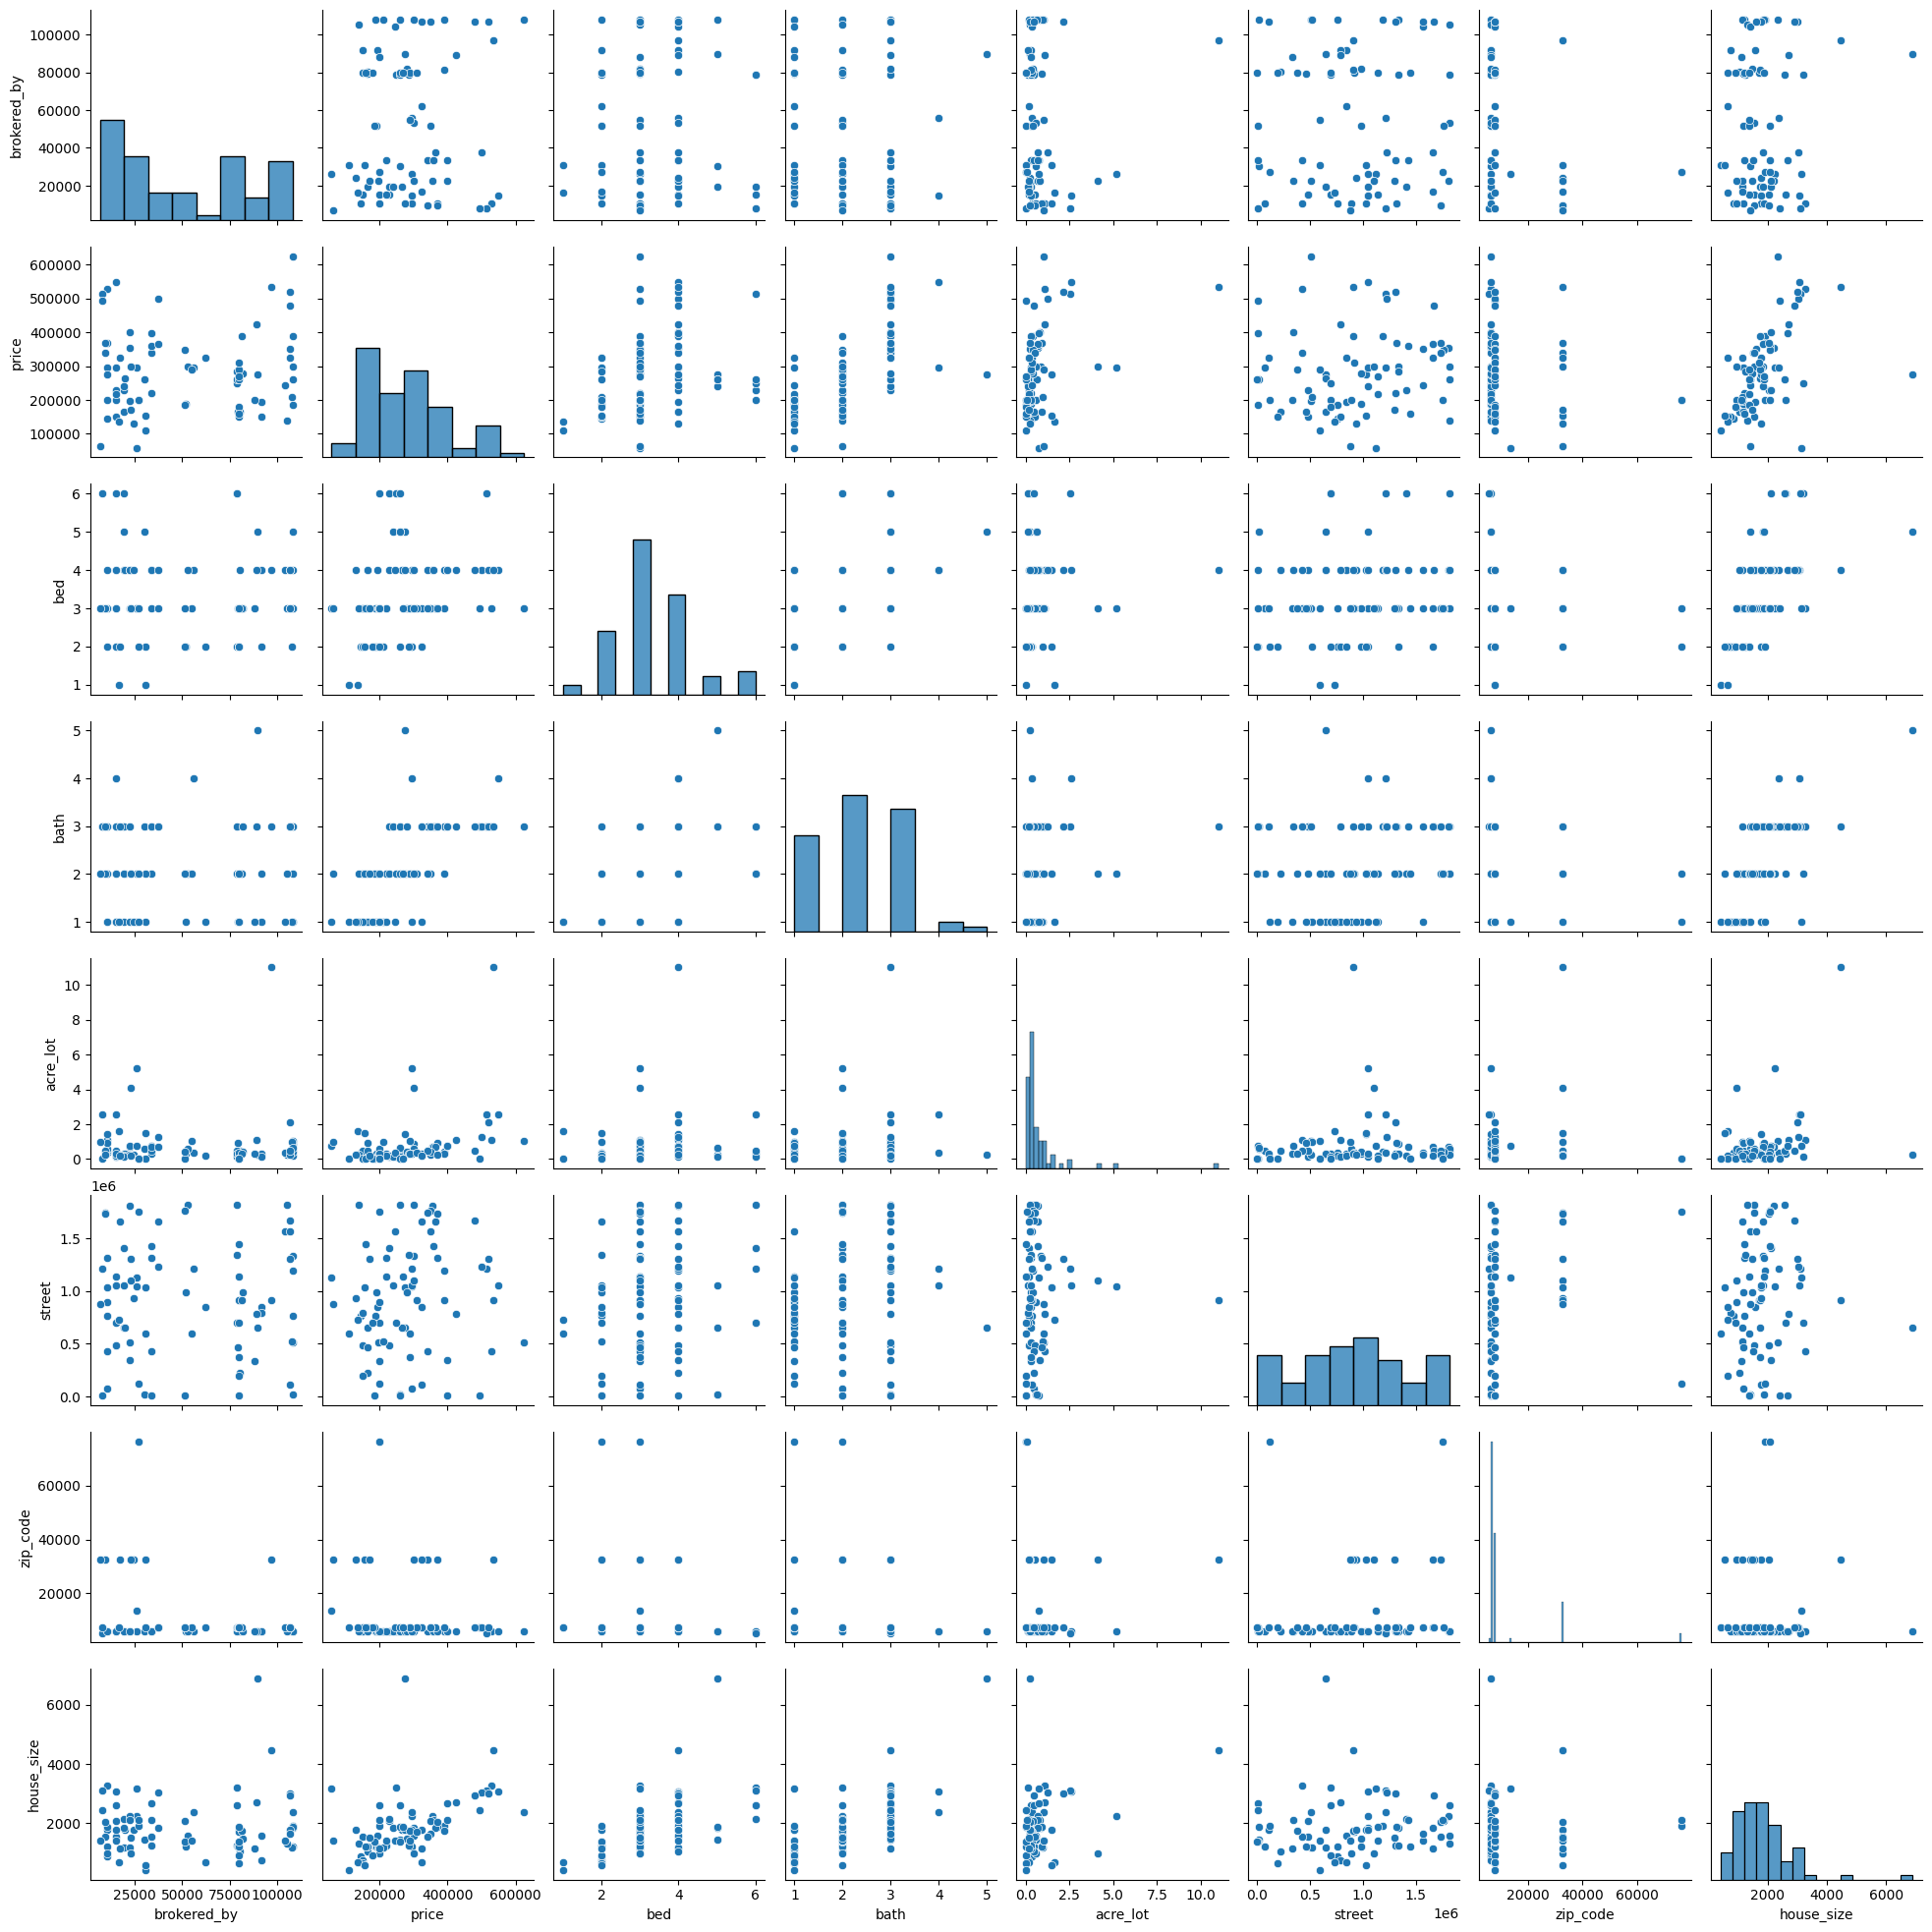

In [13]:
sns.pairplot(df2.select_dtypes(['float', 'int']))
plt.show()

In [14]:
us_cities = pd.read_csv('us_cities.csv')

In [15]:
us_cities.head()

,ID,STATE_CODE,STATE_NAME,CITY,COUNTY,LATITUDE,LONGITUDE
0,1,AK,Alaska,Adak,Aleutians West,55.999722,-161.207778
1,2,AK,Alaska,Akiachak,Bethel,60.891854,-161.392330
2,3,AK,Alaska,Akiak,Bethel,60.890632,-161.199325
3,4,AK,Alaska,Akutan,Aleutians East,54.143012,-165.785368
4,5,AK,Alaska,Alakanuk,Kusilvak,62.746967,-164.602280


In [16]:
df1['city'] = df1['city'].str.strip().str.title()
df1['state'] = df1['state'].str.strip().str.title()
us_cities['city'] = us_cities['CITY'].str.strip().str.title()
us_cities['state'] = us_cities['STATE_NAME'].str.strip().str.title()

df1 = df1.merge(us_cities[['city', 'state', 'LATITUDE', 'LONGITUDE']], on=['city', 'state'], how='left')

In [17]:
df1.head()
df1 =df1.dropna()
df1.shape

(346752, 14)

In [18]:
df1.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,LATITUDE,LONGITUDE
0,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,949.0,1192.0,6/28/2019,18.464444,-66.270278
3,21163.0,for_sale,525000.0,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,6/25/2014,42.070206,-72.622739
4,67455.0,for_sale,289900.0,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,10/12/2012,42.070206,-72.622739
5,97400.0,for_sale,384900.0,3.0,2.0,0.46,1244899.0,Agawam,Massachusetts,1001.0,1476.0,11/20/1986,42.070206,-72.622739
6,33714.0,for_sale,199999.0,3.0,2.0,1.76,1745924.0,Agawam,Massachusetts,1001.0,1968.0,9/19/2008,42.070206,-72.622739


In [19]:
df1 = df1[df1['status'] != 'ready_to_build']
df1['status'].unique()

array(['for_sale'], dtype=object)

In [23]:
X = df1[['bed', 'bath', 'acre_lot', 'house_size', 'LATITUDE', 'LONGITUDE']]  
y = df1['price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 1150886221009.122
R-squared: 0.18367372297834084


In [27]:
coefficients = pd.Series(model.coef_, index=X.columns)
print("Model Coefficients:")
print(coefficients)

AttributeError: 'GridSearchCV' object has no attribute 'coef_'

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline


X = df1[['bed', 'bath', 'acre_lot', 'house_size', 'LATITUDE', 'LONGITUDE']]
y = df1['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge())
])
ridge_params = {'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso(max_iter=10000))
])
lasso_params = {'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

elastic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', ElasticNet(max_iter=10000))
])
elastic_params = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10],
    'regressor__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1]
}

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

ridge_cv = GridSearchCV(ridge_pipeline, ridge_params, cv=5, n_jobs=-1)
ridge_cv.fit(X_train, y_train)

lasso_cv = GridSearchCV(lasso_pipeline, lasso_params, cv=5, n_jobs=-1)
lasso_cv.fit(X_train, y_train)

elastic_cv = GridSearchCV(elastic_pipeline, elastic_params, cv=5, n_jobs=-1)
elastic_cv.fit(X_train, y_train)

rf_cv = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, n_jobs=-1)
rf_cv.fit(X_train, y_train)

models = {
    'Ridge': (ridge_cv, ridge_cv.predict(X_test)),
    'Lasso': (lasso_cv, lasso_cv.predict(X_test)),
    'ElasticNet': (elastic_cv, elastic_cv.predict(X_test)),
    'RandomForest': (rf_cv, rf_cv.predict(X_test))
}

for name, (model, preds) in models.items():
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f'{name} - Best Params: {model.best_params_}')
    print(f'{name} - MSE: {mse:.2f}, R²: {r2:.4f}\n')



c:\Users\TafadzwaMutiro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
121 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\TafadzwaMutiro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\TafadzwaMutiro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\TafadzwaMutiro\AppData\Local\Programs\Python\Pytho

Ridge - Best Params: {'regressor__alpha': 100}
Ridge - MSE: 1150917533290.85, R²: 0.1837

Lasso - Best Params: {'regressor__alpha': 100}
Lasso - MSE: 1150870081610.05, R²: 0.1837

ElasticNet - Best Params: {'regressor__alpha': 10, 'regressor__l1_ratio': 0.7}
ElasticNet - MSE: 1291031150728.15, R²: 0.0843

RandomForest - Best Params: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
RandomForest - MSE: 548580380120.19, R²: 0.6109



In [29]:
best_rf_params = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_split': 5,
    'min_samples_leaf': 1,
    'max_features': 'sqrt'
}

best_rf = RandomForestRegressor(**best_rf_params, random_state=42)
best_rf.fit(X_train, y_train)

y_pred_rf = best_rf.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest (Best Params) - MSE: {mse_rf:.2f}, R²: {r2_rf:.4f}')


Random Forest (Best Params) - MSE: 548580380120.19, R²: 0.6109


C:\Users\TafadzwaMutiro\AppData\Local\Temp\ipykernel_1224\3658212257.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


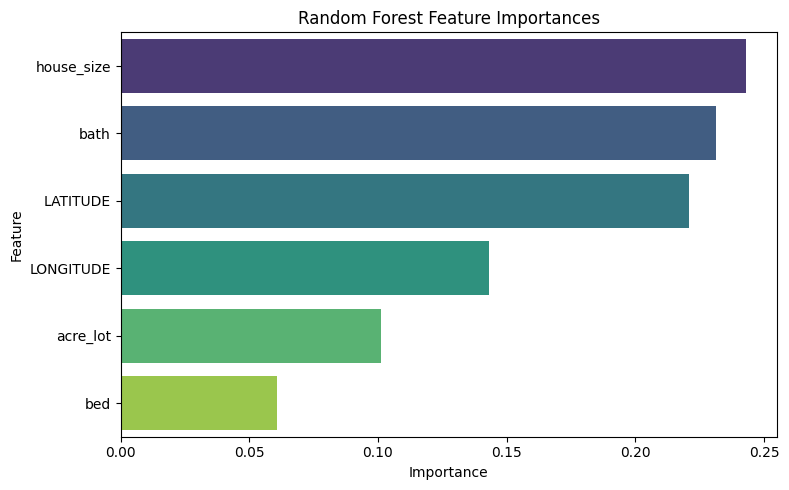

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = best_rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
